In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [6]:
#Checking for any missing value in the data
data.info()
#From below result we can see that there is no missing value in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data = data.rename(columns={'average_montly_hours':'average_weekly_hours','sales':'department'})


In [9]:
data['average_weekly_hours'] = data['average_weekly_hours']*12/52
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_weekly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,8.360947,3,0,1,0,sales,low
1,0.80,0.86,5,13.952663,6,0,1,0,sales,medium
2,0.11,0.88,7,14.485207,4,0,1,0,sales,medium
3,0.72,0.87,5,11.875740,5,0,1,0,sales,low
4,0.37,0.52,2,8.467456,3,0,1,0,sales,low


In [ ]:
#'Number of projects' and 'avg weekly hours' seems to be related, so in order to check whether these two are not highly
#correlated therefore we would find their correlation coefficient

In [11]:
print(np.corrcoef(data['number_project'],data['average_weekly_hours']))
#Below result gives 0.417 as coefficient of correlation therefore the two features are not highly correlated and therefore
#no need to remove any of the two feature.

[[1.         0.41721063]
 [0.41721063 1.        ]]


In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,10.706823,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,2.659692,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,5.112426,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,8.307692,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,10.650888,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,13.047337,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,16.508876,10.000000,1.000000,1.000000,1.000000


In [ ]:
#From the above table we can infer the following points:
#1) Employees have a relatively short tenure with the firm (average of 3.5 years, max of 10 years)
#2) Employees are generally more satisfied than not (0.61 average satisfaction level)
#3) Employyes are generally above average performers (0.716 average rating in their last evaluation)
#4) 14.46% (approximately 1 in 7) of the people have had work accidents

In [13]:
#Describing the categorical variables or features.
data.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [18]:
data[['Work_accident','left']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left',ascending=0)
#From the below result we can see that only 7.8% of employees left who had work accident and 26.5% employees left who did not have any work accident.
#Means having an accident at work does not necessarily correlate strongly with leaving the firm.
#Therefore we should not consider the Work_accident feature in our model.

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [19]:
data[['department','left']].groupby(['department'], as_index=False).mean().sort_values('left',ascending=0)
#From the below result we can observe that most of the employees who left were from 'hr' deptt and 
#all the other deptt have almost same percentage of employees turnover except 'RandD' & 'management' deptt.
#Both 'RandD' & 'management' deptt have least percentage of employees turnover as compared to other deptt.

,department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444


In [21]:
data[['salary','left']].groupby(['salary'], as_index=False).mean().sort_values('left',ascending=0)
#From the below result we can observe that 30% employees who left had low salary, 20% employees left had medium salary and
#7% employees left had high salary.
#This signifies that most of the employees left had low salary, therefore 'salary' feature can be considered as an
#important factor contributing to the employees turnover.

,salary,left
1,low,0.296884
2,medium,0.204313
0,high,0.066289


In [22]:
data[['number_project','left']].groupby(['number_project'], as_index=False).mean().sort_values('left',ascending=0)
#From the below result we can observe that:
#1) 100% of employees who had worked on 7 projects left the organisation.
#2) 66% of employees who had worked on 2 projects left.
#3) 56% of employees who had worked on 6 projects left.
#4) 22% of employees who had worked on 5 projects left.
#5) 9% of employees who had worked on 4 projects left.
#6) 2% of employees who had worked on 3 projects left.

#This signifies that all the employees who had worked on 7 projects left.
#Employees tend to leave when they're on a few projects or many projects.
#Include the number of projects feature, but consider turning it into a binary variable: 
#"Normal" (between 3 and 5 projects, since the mean number of projects is 3.8) versus not

,number_project,left
5,7,1.000000
0,2,0.656198
4,6,0.557922
3,5,0.221659
2,4,0.093700
1,3,0.017756


In [23]:
data[['time_spend_company','left']].groupby(['time_spend_company'], as_index=False).mean().sort_values('left',ascending=0)
#From the below result we cans see that:
#Employees who have spent 7 years or more in the company did not leave the company.
#Employees who have spent between 4-6 years in the company tends to leave the company.
#So we can conclude that workers are more likely to leave once they've spent a few years at the firm, but after 7 years everyone has stayed
#Therefore we can include the years at the firm feature, but band years 7 and onward.

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


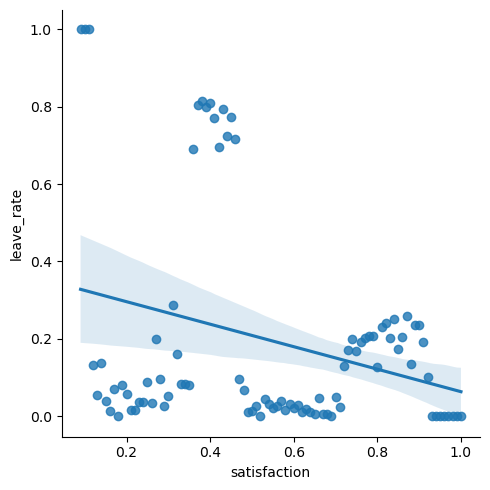

In [24]:
#To aid with selecting numeric features, we use scatterplots.
#Calculate the "leave_rate" by for each instance of the numerical features 
#by dividing the number of employees that left by the total.
leave_sat = data.groupby('satisfaction_level').agg({'left':lambda x: len(x[x==1])})
leave_sat['total'] = data.groupby('satisfaction_level').agg({'left': len})
leave_sat['leave_rate'] = leave_sat['left']/leave_sat['total']
leave_sat['satisfaction'] = data.groupby('satisfaction_level').agg({'satisfaction_level':'mean'})
g = sns.lmplot('satisfaction','leave_rate',data=leave_sat)

In [ ]:
#From the above plot we can see that lower satisfaction levels are associated with higher levels of turnover, as expected.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


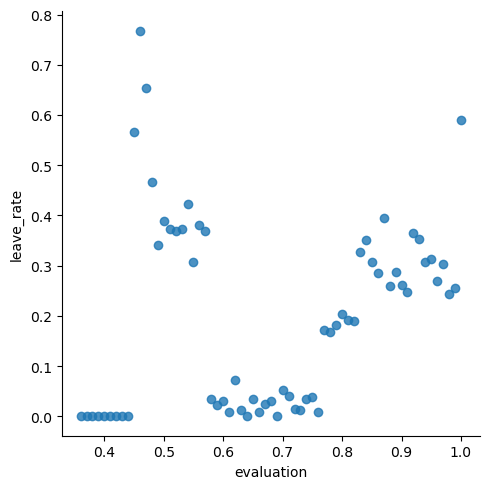

In [25]:
leave_eval = data.groupby('last_evaluation').agg({'left': lambda x: len(x[x==1])})
leave_eval['total'] = data.groupby('last_evaluation').agg({'left': len})
leave_eval['leave_rate'] = leave_eval['left']/leave_eval['total']
leave_eval['evaluation'] = data.groupby('last_evaluation').agg({'last_evaluation': 'mean'})
gr = sns.lmplot('evaluation', 'leave_rate',data=leave_eval,fit_reg=False)
#1) Regarding evaluation scores, it's interesting to note the two "clusters" that 
#the people who leave tend to either have received low scores (.6 and below) or very high scores (.8 and above). 
#2) Employees scoring in the middle rarely left.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


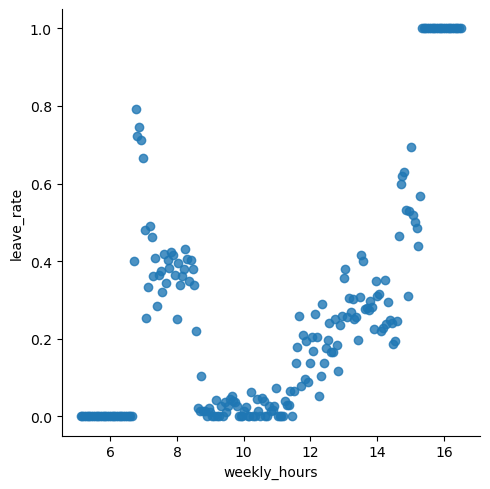

In [26]:
leave_hours = data.groupby('average_weekly_hours').agg({'left': lambda x: len(x[x==1])})
leave_hours['total'] = data.groupby('average_weekly_hours').agg({'left': len})
leave_hours['leave_rate'] = leave_hours['left']/leave_hours['total']
leave_hours['weekly_hours'] = data.groupby('average_weekly_hours').agg({'average_weekly_hours': 'mean'})
grid=sns.lmplot('weekly_hours', 'leave_rate',data=leave_hours,fit_reg=False)

In [ ]:
#From the above result we can see that:
#People tend to leave when they are overworked or underworked.
#We also observe that the pattern we see for the weekly hours feature is similar to that of the number of projects feature.

In [ ]:
#Given that both the 'weekly hours' feature and 'number of projects' feature exhibit a comparable clustering effect
#and that there is a moderate correlation between these variables (.417, as calculated earlier).
#Therefore we will only use the number of projects feature in our model and discard the weekly hours feature for simplicity.

In [27]:
#Checking whether 'department' affects the 'avg weekly hours' feature of the employee which in result affects employee turnover.
data[['department','average_weekly_hours']].groupby(['department'], as_index=False).mean().sort_values('average_weekly_hours', ascending=False)

,department,average_weekly_hours
9,technical,10.783887
0,IT,10.768898
4,management,10.717413
2,accounting,10.712821
7,sales,10.699421
1,RandD,10.693518
8,support,10.691264
6,product_mng,10.649057
5,marketing,10.618178
3,hr,10.580842


In [ ]:
#From the above result we can see that there are very minimal differences in the weekly hours worked across departments.
#The department feature does not seem very useful therefore we will not include this in our model.

In [28]:
#Checking how many employees got promoted in the last 5 years.
data.promotion_last_5years.value_counts()
#From the below result we can see that only 319 employees got promoted in the last 5 years.
#This percentage is too small for the feature to be a meaningful predictor.
#Therefore we won't be using 'promotion_last_5years' feature in our model.

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [29]:
data = data.drop(['promotion_last_5years'], axis=1)

In [30]:
#Data Wrangling
#Now as per our above analysis, we drop features having no use in our analysis model.
#Therefore dropping features - 'Work_accident','department','average_weekly_hours'
data = data.drop(['Work_accident','department','average_weekly_hours'], axis=1)

In [31]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'left', 'salary'],
      dtype='object')

In [42]:
#Banding 'number_project'
bins=[0,2,5,10]
names=[1,0,1]
data['abnormal_proj'] = pd.cut(data['number_project'],bins,labels=names,ordered=False)
#banding years at the firm
bins2=[0,1,2,3,4,5,6,100]
names2=['1','2','3','4','5','6','7']
data['years_at_company']=pd.cut(data['time_spend_company'],bins2,labels=names2,ordered=False)
#banding last_evaluation
bins3=[0,.6,.8,1]
names3=[1,0,1]
data['abnormal_eval']=pd.cut(data['last_evaluation'],bins3,labels=names3,ordered=False)
data.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,0.53,2,3,1,low,1,3,1
1,0.80,0.86,5,6,1,medium,0,6,1
2,0.11,0.88,7,4,1,medium,1,4,1
3,0.72,0.87,5,5,1,low,0,5,1
4,0.37,0.52,2,3,1,low,1,3,1


In [43]:
#cleaning up intermediary/unused columns
data = data.drop(['number_project','time_spend_company','last_evaluation'],axis=1)
data.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,low,1,3,1
1,0.80,1,medium,0,6,1
2,0.11,1,medium,1,4,1
3,0.72,1,low,0,5,1
4,0.37,1,low,1,3,1


In [44]:
#turning all columns into numeric so that modeling algorithms can run
data['salary'] = data['salary'].map({'low':0,'medium':1,'high':2}).astype(int)
pd.to_numeric(data['abnormal_proj'], errors='coerce')
pd.to_numeric(data['years_at_company'], errors='coerce')
pd.to_numeric(data['abnormal_eval'], errors='coerce')
data.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,0,1,3,1
1,0.80,1,1,0,6,1
2,0.11,1,1,1,4,1
3,0.72,1,0,0,5,1
4,0.37,1,0,1,3,1


In [89]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 3.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.6 MB/s eta 0:00:0000:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


In [49]:
#Modeling
#Splitting our dataset into a training set and test set. We use an 80-20 split, as is standard.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,data['left'],shuffle=True,test_size=0.2,random_state=42)
X_train = X_train.drop('left',axis=1)
X_test = X_test.drop('left',axis=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11999, 5) (11999,)
(3000, 5) (3000,)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [98]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


85.5

In [82]:
#SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

93.22

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values expl

85.05

In [85]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.92

In [87]:
#Model Evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)
#From the below result we can see that decision tree scored the highest predicting score i.e., 98%

,Model,Score
4,Decision Tree,97.92
1,KNN,97.07
0,Support Vector Machines,93.22
2,Logistic Regression,85.50
3,Naive Bayes,85.05


In [ ]:
#After performing all the above analysis we can conclude the following retention strategies for our target employees:
#1) Since majority percentage of employees turnover was from 'HR' deptt, therefore we need to bring in more employee
#friendly schemes particularly in HR deptt to reduce the employees turnover.
#2) It was also observed that almost 30% of the total employees who left was because of the low salary, therefore we 
#need to increase the salaries of the employees as per current industry standards and can also implement incentive and rewards scheme for the employees.
#3) It was also observed in our analysis that employees who has worked on too many projects or too less projects tends to
# leave the company whereas employees who have worked on avg number of projects tends to stay, therefore we need to
#balance out the of project distribution among the employees, we need to check that some employees shouldn't
#get burdened with too many projects and also it should not be the case that some employees are having very less project
#and their time and skills are getting wasted.
#4) It was also observed that senior employeees who have worked for more than 7 years in the company not to leave the company,
#whereas junior or mid level employees tends to leave the company, therefore we need to create policies and schemes (like for senior level employees) which
#makes junior and mid level employees of the company to remain stick to the company.
#5) Also it was observed that those employees tends to leave who got either very low evaluation score or very high evaluation
#score  from the company, we need to bring in more clarity and make evaluation measures more employee friendly so that
#employees don't consider the evaluation too seriously and always strive to emprove their scores.
#6) I was also observed that employees leave when they are overworked or underworked, therefore we need to systematically
# plan and distribute the work among the employees to properly handle their work load management.
#7) Also it was observed that out of total of '14999' employees, only '319' employees got promotion in the last 5 years,
#therefore we need to reward more employees more frequently in order to retain the target employees.